In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib 
import os

C:\Users\Luis\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
os.chdir('C:/Users/Luis/Box/R15 Sensor Preprocessing and Analysis/JPCS Special Issue') #set directory for desktop
#os.chdir('/Users/sandoval/Library/CloudStorage/Box-Box/R15 Sensor Preprocessing and Analysis/JPCS Special Issue') #this is for when i use my mac instead of my desktop
raw = pd.read_csv('Full_Summary_Features_clean_2-24-2024.csv') #filtered summary data from madison

In [3]:
#i want to see all the columns so i can specifically pick the features i actually want
    #we are going to make a dataset containing just restrict alongside predictors aka physio
    #then we are going to make another dataset containing just urge to restrict alongside physio
    #we don't want to include any other EMA in our train/test data for each analysis

for col in raw.columns: 
    print(col) 

Unnamed..0
Time
HR_Mean
HR_Minimum
HR_Maximum
HR_Stdev
HR_RMS
HR_MAD
HR_MAV
HR_Median
HR_P25
HR_P75
EDA_Mean
EDA_Minimum
EDA_Maximum
EDA_Stdev
EDA_RMS
EDA_MAD
EDA_MAV
EDA_Median
EDA_P25
EDA_P75
TEMP_Mean
TEMP_Minimum
TEMP_Maximum
TEMP_Stdev
TEMP_RMS
TEMP_MAD
TEMP_MAV
TEMP_Median
TEMP_P25
TEMP_P75
meanCenteredEDA_Mean
meanCenteredEDA_Minimum
meanCenteredEDA_Maximum
meanCenteredEDA_Stdev
meanCenteredEDA_RMS
meanCenteredEDA_MAD
meanCenteredEDA_MAV
meanCenteredEDA_Median
meanCenteredEDA_P25
meanCenteredEDA_P75
meanCenteredHR_Mean
meanCenteredHR_Minimum
meanCenteredHR_Maximum
meanCenteredHR_Stdev
meanCenteredHR_RMS
meanCenteredHR_MAD
meanCenteredHR_MAV
meanCenteredHR_Median
meanCenteredHR_P25
meanCenteredHR_P75
meanCenteredTEMP_Mean
meanCenteredTEMP_Minimum
meanCenteredTEMP_Maximum
meanCenteredTEMP_Stdev
meanCenteredTEMP_RMS
meanCenteredTEMP_MAD
meanCenteredTEMP_MAV
meanCenteredTEMP_Median
meanCenteredTEMP_P25
meanCenteredTEMP_P75
ethica_time
lag
tdif
cumsumT
ethica_time_utc
dayvar
beepvar


In [4]:
#descriptives for paper

raw['restrict'].mean()
raw['restrict'].min()
raw['restrict'].max()
raw['restrict'].std()

34.06041654648963

In [5]:
raw['urge_restrict'].mean()
raw['urge_restrict'].min()
raw['urge_restrict'].max()
raw['urge_restrict'].std()

31.124504242823576

In [6]:
#row_nan_count = .isna().sum(axis=1)

raw["urge_restrict"].isna().sum() #71 urge_restrict points missing 
raw["restrict"].isna().sum() #54 restrict items missing
len(raw["urge_restrict"])
raw

,Unnamed..0,Time,HR_Mean,HR_Minimum,HR_Maximum,HR_Stdev,HR_RMS,HR_MAD,HR_MAV,HR_Median,...,socialanx_medCentered,sens_body_meanCentered,sens_body_medCentered,ridthoughts_meanCentered,ridthoughts_medCentered,memories_meanCentered,memories_medCentered,chewspit_meanCentered,chewspit_medCentered,PR
0,117,58:00.0,93.129563,66.83,120.20,14.947826,94.321047,13.171499,120.20,94.55,...,21.0,0.279661,-1.0,13.211864,3.0,10.110169,-0.5,0.0,0.0,PR003
1,116,28:00.0,67.698626,56.77,85.90,6.844791,68.043630,5.718079,85.90,67.03,...,22.0,3.279661,2.0,7.211864,-3.0,-58.889831,-69.5,0.0,0.0,PR003
2,115,56:00.0,70.553065,55.93,93.38,9.837114,71.235269,7.708571,93.38,68.85,...,0.0,-1.720339,-3.0,12.211864,2.0,-58.889831,-69.5,0.0,0.0,PR003
3,114,56:00.0,90.937768,57.98,149.50,25.878040,94.546664,23.029055,149.50,84.10,...,0.0,-2.720339,-4.0,3.211864,-7.0,9.110169,-1.5,0.0,0.0,PR003
4,113,25:00.0,74.612836,57.92,93.05,10.477028,75.344527,8.849632,93.05,75.70,...,0.0,1.279661,0.0,17.211864,7.0,9.110169,-1.5,0.0,0.0,PR003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,3,18:00.0,89.603111,67.65,105.58,11.408228,90.326137,9.806514,105.58,93.92,...,0.0,-15.258427,-16.0,10.022472,8.0,-1.314607,0.0,0.0,0.0,PR128
1826,4,14:00.0,86.490337,71.97,105.58,10.494469,87.124431,9.454118,105.58,84.92,...,0.0,-15.258427,-16.0,10.022472,8.0,-1.314607,0.0,0.0,0.0,PR128
1827,2,27:00.0,81.366835,59.48,111.25,10.247335,82.009304,8.262121,111.25,78.70,...,0.0,-15.258427,-16.0,-12.977528,-15.0,-1.314607,0.0,0.0,0.0,PR128
1828,1,53:00.0,123.766039,83.67,200.65,29.368184,127.201272,23.482926,200.65,116.10,...,0.0,-15.258427,-16.0,-12.977528,-15.0,-1.314607,0.0,0.0,0.0,PR128


In [7]:
#random seed. I picked 6 because I like 6 and i always pick 6. this is so we get the same results every time
np.random.seed(6)

In [8]:
corrs = raw.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev',  
                    'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median',
                    'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                    'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD',
                    'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75',
                    'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev',
                    'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median',
                    'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'urge_restrict', 'restrict'])

In [9]:
corrs = corrs.rename(columns={"meanCenteredEDA_Mean" : "EDA_Mean",
                      "meanCenteredEDA_Minimum" : "EDA_Minimum",
                      "meanCenteredEDA_Maximum" : "EDA_Maximum",
                      "meanCenteredEDA_Stdev" : "EDA_Stdev",
                      "meanCenteredEDA_RMS" : "EDA_RMS",
                      "meanCenteredEDA_MAD" : "EDA_MAD",
                      "meanCenteredEDA_MAV" : "EDA_MAV",
                      "meanCenteredEDA_Median" : "EDA_Median",
                      "meanCenteredEDA_P25" : "EDA_P25",
                      "meanCenteredEDA_P75" : "EDA_P75",
                      "meanCenteredHR_Mean" : "HR_Mean",
                      "meanCenteredHR_Minimum" : "HR_Minimum",
                      "meanCenteredHR_Maximum" : "HR_Maximum",
                      "meanCenteredHR_Stdev" : "HR_Stdev",
                      "meanCenteredHR_RMS" : "HR_RMS",
                      "meanCenteredHR_MAD" : "HR_MAD",
                      "meanCenteredHR_MAV" : "HR_MAV",
                      "meanCenteredHR_Median" : "HR_Median",
                      "meanCenteredHR_P25" : "HR_P25",
                      "meanCenteredHR_P75" : "HR_P75",
                      "meanCenteredTEMP_Mean" : "TEMP_Mean",
                      "meanCenteredTEMP_Minimum" : "TEM_Minimum",
                      "meanCenteredTEMP_Maximum" : "TEMP_Maximum",
                      "meanCenteredTEMP_Stdev" : "TEMP_Stdev",
                      "meanCenteredTEMP_RMS" : "TEMP_RMS",
                      "meanCenteredTEMP_MAD" : "TEMP_MAD",
                      "meanCenteredTEMP_MAV" : "TEMP_MAV",
                      "meanCenteredTEMP_Median" : "TEMP_Median",
                      "meanCenteredTEMP_P25" : "TEMP_P25",
                      "meanCenteredTEMP_P75" : "TEMP_P75",
                      "urge_restrict" : "urge_restrict",
                      "restrict" : "restrict"})

In [10]:
Corr_Matrix = round(corrs.corr(),2)
print(Corr_Matrix)

               EDA_Mean  EDA_Minimum  EDA_Maximum  EDA_Stdev  EDA_RMS  \
EDA_Mean           1.00         0.86         0.93       0.69     0.92   
EDA_Minimum        0.86         1.00         0.65       0.28     0.70   
EDA_Maximum        0.93         0.65         1.00       0.89     0.92   
EDA_Stdev          0.69         0.28         0.89       1.00     0.77   
EDA_RMS            0.92         0.70         0.92       0.77     1.00   
EDA_MAD            0.69         0.28         0.88       1.00     0.76   
EDA_MAV            0.88         0.58         0.97       0.90     0.96   
EDA_Median         1.00         0.88         0.90       0.65     0.91   
EDA_P25            0.98         0.93         0.85       0.54     0.87   
EDA_P75            0.99         0.80         0.95       0.76     0.93   
HR_Mean            0.11         0.07         0.12       0.11     0.16   
HR_Minimum         0.11         0.07         0.13       0.11     0.16   
HR_Maximum         0.07         0.05         0.08  

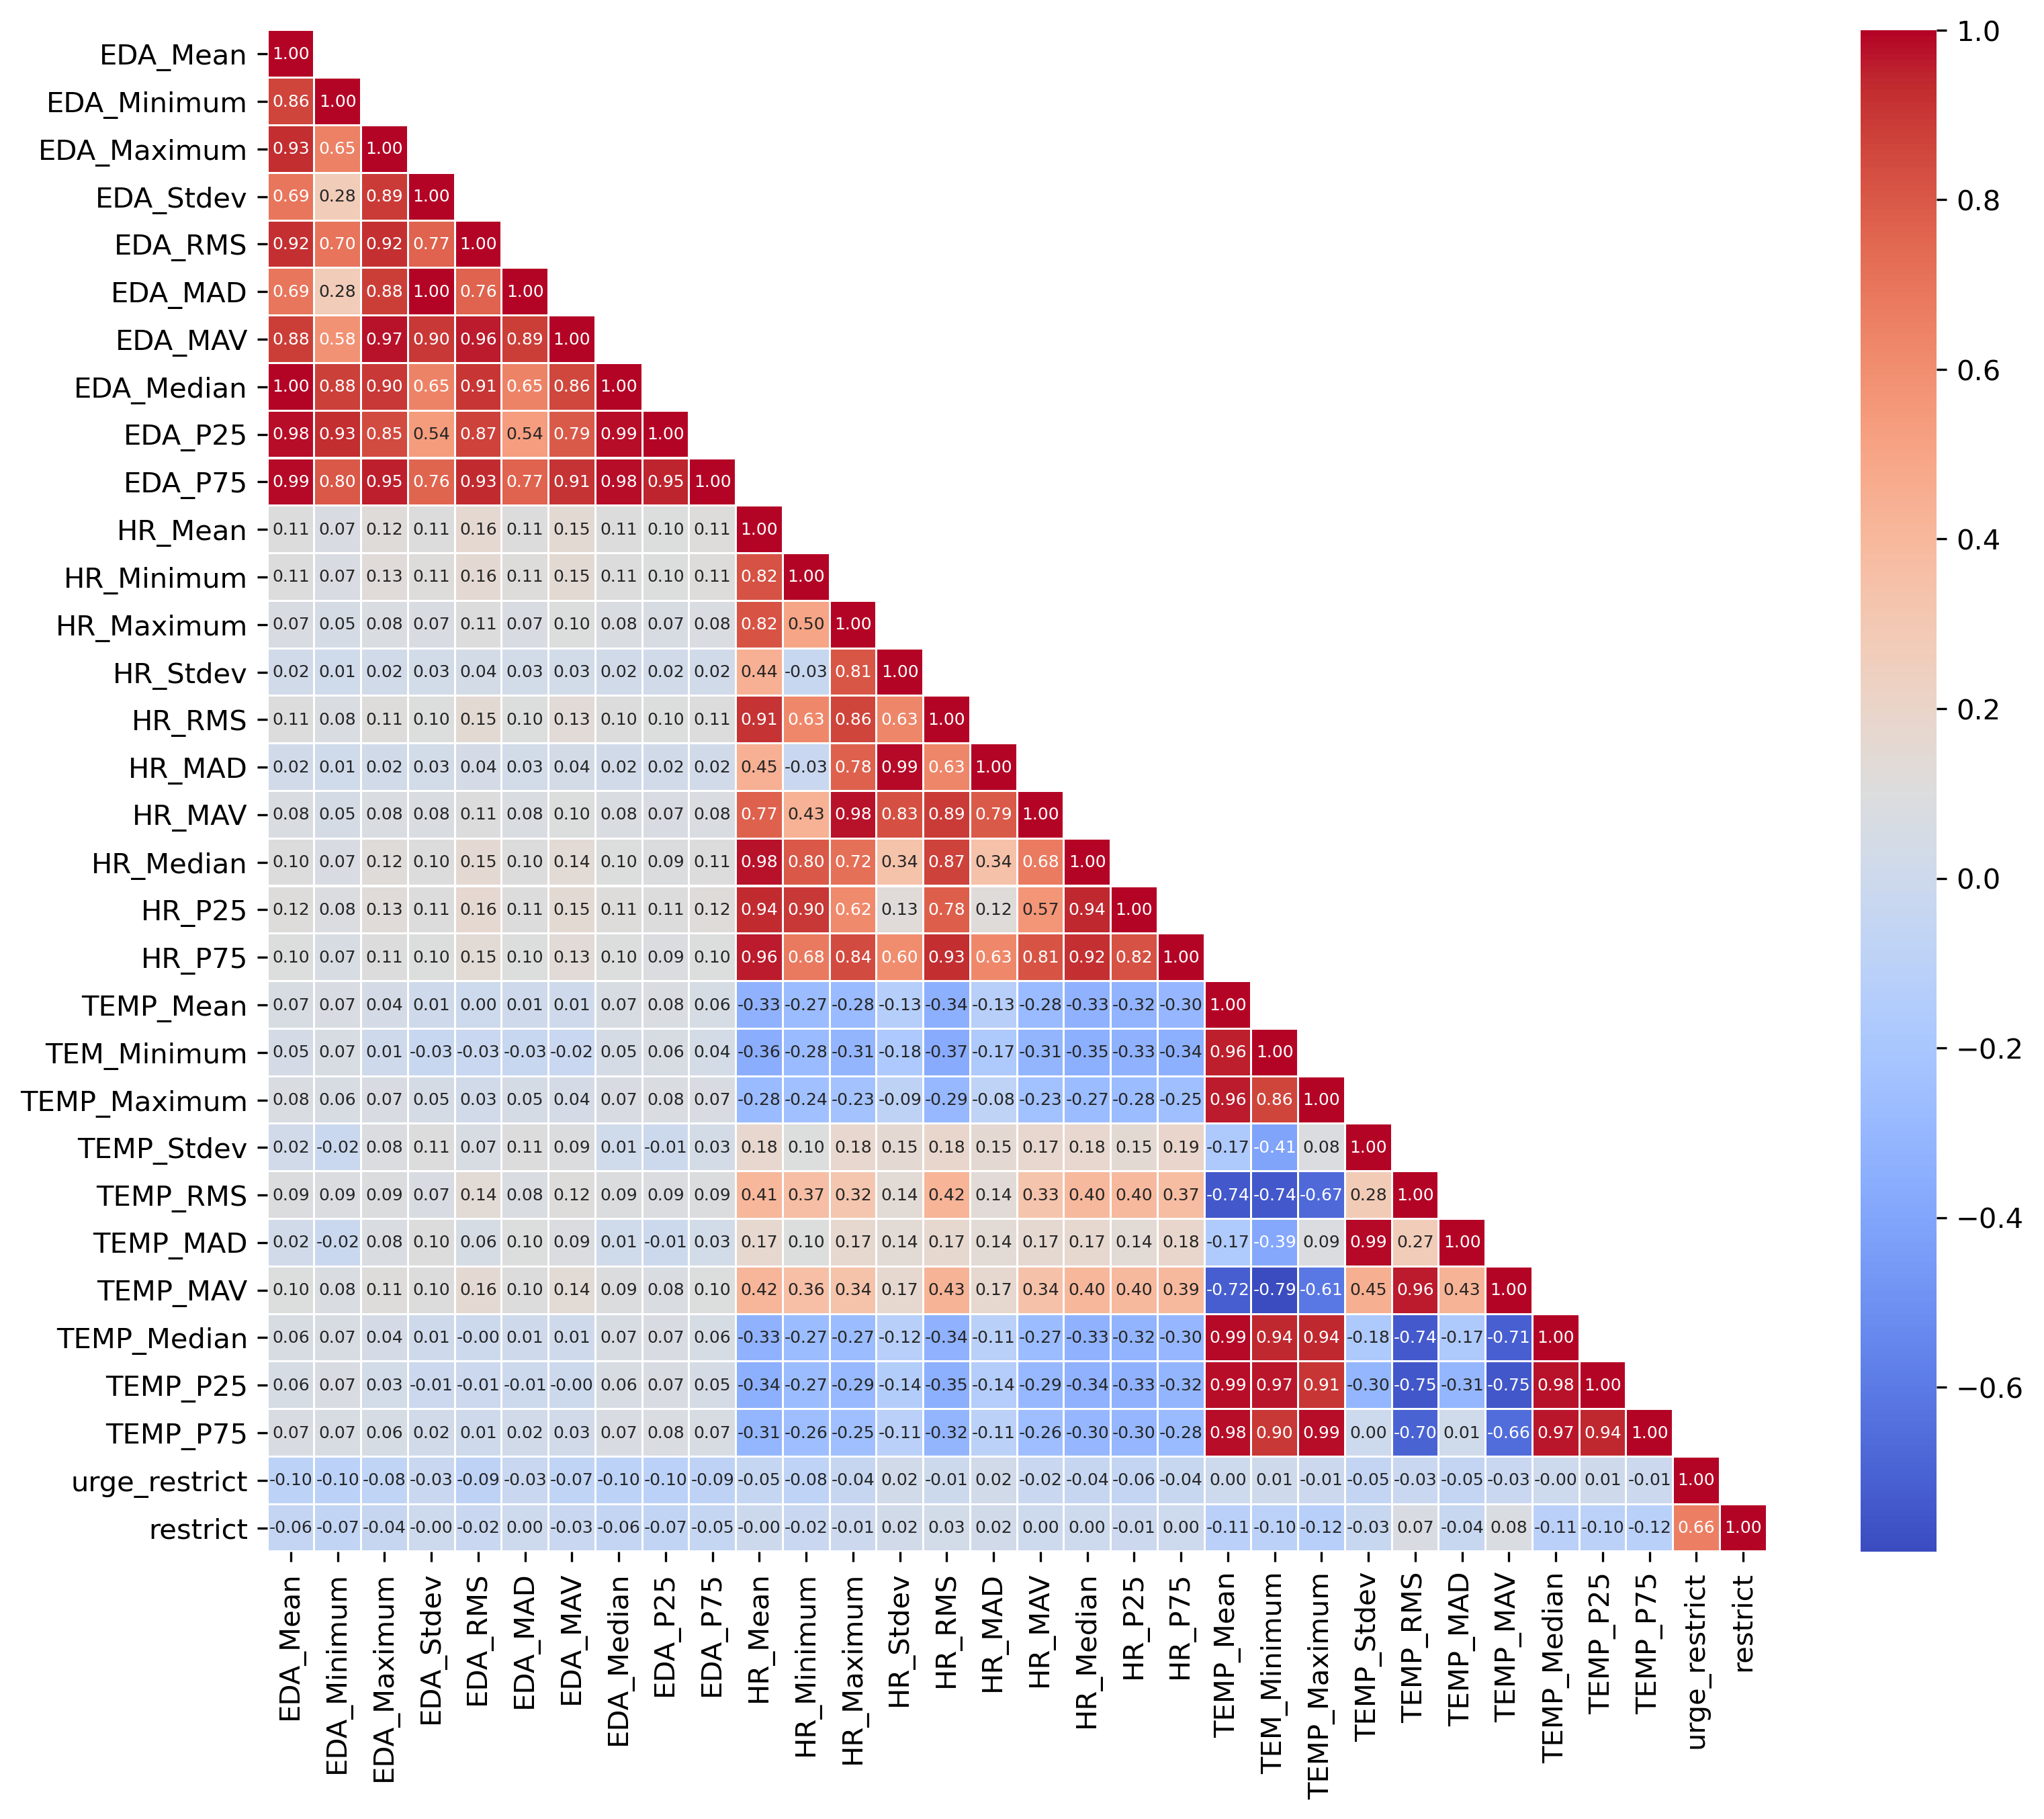

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_full = corrs.corr()

mask = np.zeros_like(correlation_full, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)
 
plt.figure(figsize=(12,10), dpi =300)
sns.heatmap(correlation_full,fmt=".2f", linewidth=.5, cmap = 'coolwarm', mask = mask, annot=True,annot_kws={"fontsize": 6})
plt.show()

In [12]:
#creating the dataset for predicting urge_restrict from physio alone
urgeData = raw.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'urge_restrict'])

In [13]:
#creating the dataset for predicting restrict from physio alone
restrictData = raw.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'restrict'])

In [14]:
urgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(urgeData['urge_restrict'])) #check that NAs exist - if false, we are good

restrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(restrictData['restrict'])) #check that NAs exist - if false, we are good

False

In [15]:
#we want to randomly assort the rows in these dataframes now since they're clustered by participant
restrictDataShuffled = restrictData.sample(frac = 1) #shuffle restriction dataset
urgeDataShuffled = urgeData.sample(frac = 1) #shuffle urge dataset

In [16]:
#now what i want to do is reserve a portion of the data to test after the fact - the remaining data we'll do k-fold grid search cross validation
#we're going to split the data as follows: 
#80% of the data is going to be the train/test data for the model
#the remaining 20% will be held and we will use the trained/tested model to see how closely it predicts the 20% holdover set

from sklearn.model_selection import train_test_split

urgeX = urgeDataShuffled.drop(columns = {'urge_restrict'}) #drop urge_restrict from dataframe for the splitting
urgey = urgeDataShuffled.filter(['urge_restrict']) #make a dataframe containing only urge_restrict variable

restX = restrictDataShuffled.drop(columns = {'restrict'})
resty = restrictDataShuffled.filter(['restrict'])

In [17]:
urgeX_train, urgeX_test, urgey_train, urgey_test = train_test_split(urgeX, urgey, random_state=6,test_size=0.20) 
restX_train, restX_test, resty_train, resty_test = train_test_split(restX, resty, random_state=6,test_size=0.20) 
#we're sticking with 6 for random_state
#the test sets are what we are going to validate our models on later

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from numpy import arange

#we're going to start exclusively with the urge data for now, we'll circle back to the restrict data later 

urgeMod = ElasticNet(max_iter = 1000) 
urgecv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6) #i still like 6, we're doing a 10-fold cross-validation repeating 3 times

In [19]:
from numpy import mean
from numpy import std
from numpy import absolute

#developing a grid search cross-validation function that will provide us with a dictionary that contains the hyperparameters
#the dictionary with hyperparameters will allow us to automatically plug in our best hyperparameters 
def cross_validation(model, _X, _y, _cv):
    param_grid = {'alpha'     : [0.1,1,10,0.01],
                'l1_ratio'  :  np.arange(0.40,1.00,0.10),
                'tol'       : [0.0001,0.001] }
    _scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = _cv, scoring = _scoring, return_train_score = True, refit= 'neg_mean_absolute_error', n_jobs = -1)
    grid_search.fit(X = _X, y = _y,)
    d = dict()
    d['results'] = pd.DataFrame(grid_search.cv_results_)
    alpha = format(grid_search.best_params_).partition("{'alpha': ")[2] #alpha parameter
    d['alpha'] = alpha.partition(",")[0]
    l1 = format(grid_search.best_params_).partition("'l1_ratio': ")[2] #L1 ratio parameter
    d['l1'] = l1.partition(",")[0]
    tol = format(grid_search.best_params_).partition("'tol': ")[2] #tolerance parameter
    d['tol'] = tol.partition("}")[0]
    ind = format(grid_search.best_index_) #best index - this will be used to find our associated test R2
    d['ind'] = ind
    print("Best parameters : {}".format(grid_search.best_params_))
    print("Best cross validation score: {:.2f}".format(grid_search.best_score_))
    print("Best index: {}".format(grid_search.best_index_))
    print("Best alpha : " + d['alpha'])
    print("Best L1 : " + d['l1'])
    print("Best tol : " + d['tol'])
    return d
           

In [20]:
urgecv_result = cross_validation(urgeMod, urgeX_train, urgey_train, urgecv) #this does the cross validation
urgecv_r2 = urgecv_result['results']['mean_train_r2'].mean() #deriving the mean of the train R2's from cross validation
urgecv_r2med = urgecv_result['results']['mean_train_r2'].median() #deriving the median of the train R2's from cross validation
print("Median Validation R2 = " + str(urgecv_r2med))
print("Mean Validation R2 = " + str(urgecv_r2)) 
print("Best Validation R2 = " + str(urgecv_result['results']['mean_test_r2'][float(urgecv_result['ind'])])) # this represents the corresponding test R2 associated with our best parameters

Best parameters : {'alpha': 1, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -26.81
Best index: 13
Best alpha : 1
Best L1 : 0.4
Best tol : 0.001
Median Validation R2 = 0.04495040349108069
Mean Validation R2 = 0.040957225341871344
Best Validation R2 = 0.009725294491224145


In [21]:
### now we build the final model for urge - we are using the optimal hyperparameters divulged through the grid search 
### to fit a final model and then test it on the hold-out test set
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error as mae 

urgeModTuned = ElasticNet(alpha = float(urgecv_result['alpha']), l1_ratio = float(urgecv_result['l1']), tol = float(urgecv_result['tol'])).fit(urgeX_train,urgey_train)
urgeyPred = urgeModTuned.predict(urgeX_test)
mae(urgey_test,urgeyPred) #out of sample (OOS) MAE = 25.24
r2_score(urgey_test,urgeyPred) #OOS R2 = .018

0.018230596622308415

In [22]:
#trying restrict now 

restMod = ElasticNet(max_iter = 10000)
restcv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6)
restcv_result = cross_validation(restMod, restX_train, resty_train, restcv)
restcv_r2 = restcv_result['results']['mean_train_r2'].mean()
restcv_r2med = restcv_result['results']['mean_train_r2'].median()
print("Median Validation R2 = " + str(restcv_r2med)) # .057
print("Mean Validation R2 = " + str(restcv_r2)) # .053
print("Best Validation R2 = " + str(restcv_result['results']['mean_test_r2'][float(restcv_result['ind'])])) # .031

Best parameters : {'alpha': 0.01, 'l1_ratio': 0.7, 'tol': 0.0001}
Best cross validation score: -29.37
Best index: 42
Best alpha : 0.01
Best L1 : 0.7
Best tol : 0.0001
Median Validation R2 = 0.05681207637496791
Mean Validation R2 = 0.05286996948718222
Best Validation R2 = 0.031060535899608444


In [23]:
restModTuned = ElasticNet(alpha = float(restcv_result['alpha']), l1_ratio = float(restcv_result['l1']), tol = float(restcv_result['tol']), max_iter = 10000).fit(restX_train,resty_train)
restyPred = restModTuned.predict(restX_test)
#np.sqrt(mean_squared_error(resty_test,restyPred)) #MSE = 34.5
mae(resty_test,restyPred) #OOS MAE = 30.72
r2_score(resty_test,restyPred) # OOS R2 = -.012

-0.012166329083054261

In [24]:
#we're gonna try with diagnoses now 

diag = pd.read_csv('ScreeningsR15-EDDiagnosticsSummary_DATA_2024-02-25_1408.csv') #dataframe containing diagnoses by ID
diag["PR"] = diag['record_id_73f3b8'] #making a column to match IDs
diag = diag.filter(['PR', 'currentdx1_ade7bc']) #i want to only merge the current general diagnoses and keep the ID variable
diagRaw = diag.merge(raw, how = 'inner', on = 'PR') #we made it 

diagRaw.head()

,PR,currentdx1_ade7bc,Unnamed..0,Time,HR_Mean,HR_Minimum,HR_Maximum,HR_Stdev,HR_RMS,HR_MAD,...,socialanx_meanCentered,socialanx_medCentered,sens_body_meanCentered,sens_body_medCentered,ridthoughts_meanCentered,ridthoughts_medCentered,memories_meanCentered,memories_medCentered,chewspit_meanCentered,chewspit_medCentered
0,PR003,1.0,117,58:00.0,93.129563,66.83,120.20,14.947826,94.321047,13.171499,...,9.483051,21.0,0.279661,-1.0,13.211864,3.0,10.110169,-0.5,0.0,0.0
1,PR003,1.0,116,28:00.0,67.698626,56.77,85.90,6.844791,68.043630,5.718079,...,10.483051,22.0,3.279661,2.0,7.211864,-3.0,-58.889831,-69.5,0.0,0.0
2,PR003,1.0,115,56:00.0,70.553065,55.93,93.38,9.837114,71.235269,7.708571,...,-11.516949,0.0,-1.720339,-3.0,12.211864,2.0,-58.889831,-69.5,0.0,0.0
3,PR003,1.0,114,56:00.0,90.937768,57.98,149.50,25.878040,94.546664,23.029055,...,-11.516949,0.0,-2.720339,-4.0,3.211864,-7.0,9.110169,-1.5,0.0,0.0
4,PR003,1.0,113,25:00.0,74.612836,57.92,93.05,10.477028,75.344527,8.849632,...,-11.516949,0.0,1.279661,0.0,17.211864,7.0,9.110169,-1.5,0.0,0.0


In [25]:
pd.set_option("display.max.rows", None)
idiographicDx = diagRaw[["PR","currentdx1_ade7bc"]]
idiographicDx.drop_duplicates(keep='first')

,PR,currentdx1_ade7bc
0,PR003,1.0
116,PR008,2.0
183,PR010,1.0
253,PR011,1.0
373,PR018,1.0
388,PR020,1.0
503,PR021,4.0
514,PR022,2.0
515,PR023,1.0
553,PR025,4.0


In [26]:
#coding values: 1 = AN, 2 = BN, 3 = BED, 4 = OSFED... there should  be no BED cases. 
#we will look at AN and BN specifically for now

bnmask = diagRaw['currentdx1_ade7bc'].values == 2
bn = diagRaw.loc[bnmask]

In [27]:
anmask = diagRaw['currentdx1_ade7bc'].values == 1
an = diagRaw.loc[anmask]

In [28]:
osfedmask = diagRaw['currentdx1_ade7bc'].values == 4
osfed = diagRaw.loc[osfedmask]

In [29]:
restrictFilter = raw.groupby('PR').mean('restrict') # anyone with a mean restriction endorsement >= 40 for this analysis

In [30]:
restrictFilter['urge_restrict']

PR
PR003    82.439655
PR008    44.030303
PR010     1.354839
PR011    46.403361
PR018    69.133333
PR020    29.780702
PR021    55.500000
PR022    81.000000
PR023    47.324324
PR025    59.346535
PR030    50.692308
PR032    91.238095
PR033    79.129032
PR037    53.138614
PR038    66.944444
PR039    15.253521
PR042    22.250000
PR044    29.944444
PR048    16.591549
PR073    10.379310
PR078    36.347826
PR079    40.965517
PR084    85.333333
PR085    72.461538
PR086    53.277778
PR096    38.363636
PR101    79.736842
PR102    90.571429
PR104    93.529412
PR106     7.000000
PR113    73.400000
PR115     7.900000
PR116    71.733333
PR117    33.636364
PR126    78.416667
PR128    56.300000
Name: urge_restrict, dtype: float64

In [31]:
restrictMask = restrictFilter['restrict'].values >= 40
restrictOnly = restrictFilter.loc[restrictMask]
restrictOnly = restrictOnly.rename_axis('PR').reset_index()
restIdList = restrictOnly['PR'].copy()

In [32]:
urgeMask = restrictFilter['urge_restrict'].values >= 40
urgeOnly = restrictFilter.loc[urgeMask]
urgeOnly = urgeOnly.rename_axis('PR').reset_index()
urgeIdList = urgeOnly['PR'].copy()

In [33]:
restIdList = restIdList.tolist()
urgeIdList = urgeIdList.tolist()

In [34]:
idList = restIdList + urgeIdList
idList = set(idList)
idList

{'PR003',
 'PR008',
 'PR011',
 'PR018',
 'PR021',
 'PR022',
 'PR023',
 'PR025',
 'PR030',
 'PR032',
 'PR033',
 'PR037',
 'PR038',
 'PR044',
 'PR078',
 'PR079',
 'PR084',
 'PR085',
 'PR086',
 'PR101',
 'PR102',
 'PR104',
 'PR113',
 'PR116',
 'PR117',
 'PR126',
 'PR128'}

In [35]:
restrictData = raw.loc[raw["PR"].isin(idList)]
len(restrictData['PR'].unique()) #27 cases in restriction analysis

27

In [36]:
restrictData

,Unnamed..0,Time,HR_Mean,HR_Minimum,HR_Maximum,HR_Stdev,HR_RMS,HR_MAD,HR_MAV,HR_Median,...,socialanx_medCentered,sens_body_meanCentered,sens_body_medCentered,ridthoughts_meanCentered,ridthoughts_medCentered,memories_meanCentered,memories_medCentered,chewspit_meanCentered,chewspit_medCentered,PR
0,117,58:00.0,93.129563,66.83,120.20,14.947826,94.321047,13.171499,120.20,94.55,...,21.0,0.279661,-1.0,13.211864,3.0,10.110169,-0.5,0.000000,0.0,PR003
1,116,28:00.0,67.698626,56.77,85.90,6.844791,68.043630,5.718079,85.90,67.03,...,22.0,3.279661,2.0,7.211864,-3.0,-58.889831,-69.5,0.000000,0.0,PR003
2,115,56:00.0,70.553065,55.93,93.38,9.837114,71.235269,7.708571,93.38,68.85,...,0.0,-1.720339,-3.0,12.211864,2.0,-58.889831,-69.5,0.000000,0.0,PR003
3,114,56:00.0,90.937768,57.98,149.50,25.878040,94.546664,23.029055,149.50,84.10,...,0.0,-2.720339,-4.0,3.211864,-7.0,9.110169,-1.5,0.000000,0.0,PR003
4,113,25:00.0,74.612836,57.92,93.05,10.477028,75.344527,8.849632,93.05,75.70,...,0.0,1.279661,0.0,17.211864,7.0,9.110169,-1.5,0.000000,0.0,PR003
5,112,17:00.0,88.017751,61.85,125.70,16.010163,89.461405,12.062949,125.70,86.20,...,0.0,12.279661,11.0,12.211864,2.0,15.110169,4.5,0.000000,0.0,PR003
6,111,24:00.0,69.070133,50.00,102.03,15.508795,70.789165,13.254219,102.03,67.33,...,0.0,9.279661,8.0,17.211864,7.0,17.110169,6.5,0.000000,0.0,PR003
7,110,55:00.0,96.050275,93.98,99.62,1.216136,96.057970,0.869442,99.62,95.95,...,17.0,7.279661,6.0,20.211864,10.0,17.110169,6.5,0.000000,0.0,PR003
8,109,36:00.0,78.444540,60.12,103.13,13.008520,79.515388,10.979822,103.13,78.48,...,0.0,-1.720339,-3.0,3.211864,-7.0,9.110169,-1.5,0.000000,0.0,PR003
9,108,05:00.0,76.180916,55.52,110.82,15.808667,77.803225,13.118658,110.82,71.67,...,31.0,-1.720339,-3.0,12.211864,2.0,11.110169,0.5,0.000000,0.0,PR003


In [37]:
restrictUrgeData = restrictData.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'urge_restrict'])

restrictRestrictData = restrictData.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'restrict'])

In [38]:
restrictUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(restrictUrgeData['urge_restrict'])) #check that NAs exist - if false, we are good

restrictRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(restrictRestrictData['restrict']))#check that NAs exist - if false, we are good

False

In [39]:
#ANALYSIS FOR RESTRICTION SAMPLE

restUrgeDataShuffled = restrictUrgeData.sample(frac = 1) #shuffling BN data
restRestrictDataShuffled = restrictRestrictData.sample(frac = 1)

restUrgeX = restUrgeDataShuffled.drop(columns = {'urge_restrict'}) #drop urge_restrict from dataframe for the splitting
restUrgey = restUrgeDataShuffled.filter(['urge_restrict']) #make a dataframe containing only urge_restrict variable

restRestX = restRestrictDataShuffled.drop(columns = {'restrict'})
restResty = restRestrictDataShuffled.filter(['restrict'])

restUrgeX_train, restUrgeX_test, restUrgey_train, restUrgey_test = train_test_split(restUrgeX, restUrgey, random_state=6,test_size=0.20) 
restRestX_train, restRestX_test, restResty_train, restResty_test = train_test_split(restRestX, restResty, random_state=6,test_size=0.20) 

In [40]:
restUrgeMod = ElasticNet(max_iter = 10000)
restUrgeCV = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6)
restUrgeCV_result = cross_validation(restUrgeMod, restUrgeX_train, restUrgey_train, restUrgeCV)
restUrgeCV_r2 = restUrgeCV_result['results']['mean_train_r2'].mean()
restUrgeCV_r2med = restUrgeCV_result['results']['mean_train_r2'].median()
print("Median Validation R2 = " + str(restUrgeCV_r2med)) # .035
print("Mean Validation R2 = " + str(restUrgeCV_r2)) # .035
print("Best Test R2 = " + str(restUrgeCV_result['results']['mean_test_r2'][float(restUrgeCV_result['ind'])])) # -.017

Best parameters : {'alpha': 0.01, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -19.19
Best index: 46
Best alpha : 0.01
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.03173017747652614
Mean Validation R2 = 0.030937289344950453
Best Test R2 = -0.0006185981343196145


In [42]:
restUrgeModTuned = ElasticNet(alpha = float(restUrgeCV_result['alpha']), l1_ratio = float(restUrgeCV_result['l1']), tol = float(restUrgeCV_result['tol']), max_iter = 10000).fit(restUrgeX_train,restUrgey_train)
restUrgeyPred = restUrgeModTuned.predict(restUrgeX_test)
mae(restUrgey_test,restUrgeyPred) #MAE = 19.88
r2_score(restUrgey_test,restUrgeyPred) #R2 = .028

19.883878721185447

In [44]:
#predicting restrict item in Restriction sample

restRestMod = ElasticNet(max_iter = 10000) 
restRestCV = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6) 

restRestCV_result = cross_validation(restRestMod, restRestX_train, restResty_train, restRestCV)
restRestCV_r2 = restRestCV_result['results']['mean_train_r2'].mean()
restRestCV_r2med = restRestCV_result['results']['mean_train_r2'].median()
print("Median Validation R2 = " + str(restRestCV_r2med)) # .060
print("Mean Validation R2 = " + str(restRestCV_r2)) # .057
print("Best Test R2 = " + str(restRestCV_result['results']['mean_test_r2'][float(restRestCV_result['ind'])])) # .019

Best parameters : {'alpha': 1, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -19.40
Best index: 12
Best alpha : 1
Best L1 : 0.4
Best tol : 0.0001
Median Validation R2 = 0.06052892576418385
Mean Validation R2 = 0.057186773301982845
Best Test R2 = 0.018913059579398907


In [49]:
restRestModTuned = ElasticNet(alpha = float(restRestCV_result['alpha']), l1_ratio = float(restRestCV_result['l1']), tol = float(restRestCV_result['tol']), max_iter = 10000).fit(restRestX_train,restResty_train)
restRestyPred = restRestModTuned.predict(restRestX_test)
mae(restResty_test,restRestyPred) #MAE = 18.46
r2_score(restResty_test,restRestyPred) #R2 = .089

0.08911893650240788

In [50]:
#BN subsets
bnUrgeData = bn.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'urge_restrict'])

bnRestrictData = bn.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'restrict'])

bnUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(bnUrgeData['urge_restrict'])) #check that NAs exist - if false, we are good

bnRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(bnRestrictData['restrict']))#check that NAs exist - if false, we are good

#AN subsets
anUrgeData = an.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'urge_restrict'])

anRestrictData = an.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'restrict'])

anUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(anUrgeData['urge_restrict'])) #check that NAs exist - if false, we are good

anRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(anRestrictData['restrict']))#check that NAs exist - if false, we are good

#OSFED subsets
osfedUrgeData = bn.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'urge_restrict'])

osfedRestrictData = bn.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'restrict'])

osfedUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(osfedUrgeData['urge_restrict'])) #check that NAs exist - if false, we are good

osfedRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(osfedRestrictData['restrict']))#check that NAs exist - if false, we are good

False

In [51]:
#ANALYSIS FOR BN

bnUrgeDataShuffled = bnUrgeData.sample(frac = 1) #shuffling BN data
bnRestrictDataShuffled = bnRestrictData.sample(frac = 1)

bnUrgeX = bnUrgeDataShuffled.drop(columns = {'urge_restrict'}) #drop urge_restrict from dataframe for the splitting
bnUrgey = bnUrgeDataShuffled.filter(['urge_restrict']) #make a dataframe containing only urge_restrict variable

bnRestX = bnRestrictDataShuffled.drop(columns = {'restrict'})
bnResty = bnRestrictDataShuffled.filter(['restrict'])

bnUrgeX_train, bnUrgeX_test, bnUrgey_train, bnUrgey_test = train_test_split(bnUrgeX, bnUrgey, random_state=6,test_size=0.20) 
bnRestX_train, bnRestX_test, bnResty_train, bnResty_test = train_test_split(bnRestX, bnResty, random_state=6,test_size=0.20) 

In [54]:
bnUrgeMod = ElasticNet(max_iter = 10000) #we're starting with default parameters - alpha=1.0, l1_ratio=0.5, increased iterations to allow convergence
bnUrgeCV = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6) 

bnUrgeCV_result = cross_validation(bnUrgeMod, bnUrgeX_train, bnUrgey_train, bnUrgeCV)
bnUrgeCV_r2 = bnUrgeCV_result['results']['mean_train_r2'].mean()
bnUrgeCV_r2med = bnUrgeCV_result['results']['mean_train_r2'].median()
print("Median Validation R2 = " + str(bnUrgeCV_r2med)) # .235
print("Mean Validation R2 = " + str(bnUrgeCV_r2)) # .225
print("Best Test R2 = " + str(bnUrgeCV_result['results']['mean_test_r2'][float(bnUrgeCV_result['ind'])])) # .041

Best parameters : {'alpha': 1, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -26.33
Best index: 13
Best alpha : 1
Best L1 : 0.4
Best tol : 0.001
Median Validation R2 = 0.2346054942029729
Mean Validation R2 = 0.2245982301726349
Best Test R2 = 0.0408656417679899


In [60]:
bnUrgeModTuned = ElasticNet(alpha = float(bnUrgeCV_result['alpha']), l1_ratio = float(bnUrgeCV_result['l1']), tol = float(bnUrgeCV_result['tol']), max_iter = 10000).fit(bnUrgeX_train,bnUrgey_train)
bnUrgeyPred = bnUrgeModTuned.predict(bnUrgeX_test)
mae(bnUrgey_test,bnUrgeyPred) #MAE = 28.81
r2_score(bnUrgey_test,bnUrgeyPred) #R2 = .095

0.09532812839376315

In [59]:
bnRestMod = ElasticNet(max_iter = 1000) #we're starting with default parameters - alpha=1.0, l1_ratio=0.5, increased iterations to allow convergence
bnRestCV = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6) 

bnRestCV_result = cross_validation(bnRestMod, bnRestX_train, bnResty_train, bnRestCV)
bnRestCV_r2 = bnRestCV_result['results']['mean_train_r2'].mean()
bnRestCV_r2med = bnRestCV_result['results']['mean_train_r2'].median()
print("Median Validation R2 = " + str(bnRestCV_r2med)) # .335
print("Mean Validation R2 = " + str(bnRestCV_r2)) # .323
print("Best Test R2 = " + str(bnRestCV_result['results']['mean_test_r2'][float(bnUrgeCV_result['ind'])])) # .16

Best parameters : {'alpha': 1, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -26.01
Best index: 13
Best alpha : 1
Best L1 : 0.4
Best tol : 0.001
Median Validation R2 = 0.3345269868074487
Mean Validation R2 = 0.322693774443736
Best Test R2 = 0.1595443169593835


In [62]:
bnRestModTuned = ElasticNet(alpha = float(bnRestCV_result['alpha']), l1_ratio = float(bnRestCV_result['l1']), tol = float(bnRestCV_result['tol']), max_iter = 10000).fit(bnRestX_train,bnResty_train)
bnRestyPred = bnRestModTuned.predict(bnRestX_test)
mae(bnResty_test,bnRestyPred) #MAE = 27.84
r2_score(bnResty_test,bnRestyPred) #.139

27.843791575972503

In [63]:
#ANALYSIS FOR AN

anUrgeDataShuffled = anUrgeData.sample(frac = 1) #shuffling BN data
anRestrictDataShuffled = bnRestrictData.sample(frac = 1)

anUrgeX = anUrgeDataShuffled.drop(columns = {'urge_restrict'}) #drop urge_restrict from dataframe for the splitting
anUrgey = anUrgeDataShuffled.filter(['urge_restrict']) #make a dataframe containing only urge_restrict variable

anRestX = anRestrictDataShuffled.drop(columns = {'restrict'})
anResty = anRestrictDataShuffled.filter(['restrict'])

anUrgeX_train, anUrgeX_test, anUrgey_train, anUrgey_test = train_test_split(anUrgeX, anUrgey, random_state=6,test_size=0.20) 
anRestX_train, anRestX_test, anResty_train, anResty_test = train_test_split(anRestX, anResty, random_state=6,test_size=0.20) 

In [65]:
anUrgeMod = ElasticNet(max_iter = 10000) #we're starting with default parameters - alpha=1.0, l1_ratio=0.5
anUrgeCV = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6) 

anUrgeCV_result = cross_validation(anUrgeMod, anUrgeX_train, anUrgey_train, anUrgeCV)
anUrgeCV_r2 = anUrgeCV_result['results']['mean_train_r2'].mean()
anUrgeCV_r2med = anUrgeCV_result['results']['mean_train_r2'].median()
print("Median Validation R2 = " + str(anUrgeCV_r2med)) # .129
print("Mean Validation R2 = " + str(anUrgeCV_r2)) # .114
print("Best Test R2 = " + str(anUrgeCV_result['results']['mean_test_r2'][float(anUrgeCV_result['ind'])])) # .063

Best parameters : {'alpha': 0.1, 'l1_ratio': 0.7999999999999999, 'tol': 0.0001}
Best cross validation score: -24.39
Best index: 8
Best alpha : 0.1
Best L1 : 0.7999999999999999
Best tol : 0.0001
Median Validation R2 = 0.12877591916245315
Mean Validation R2 = 0.1137062122523103
Best Test R2 = 0.06293659781760488


In [68]:
anUrgeModTuned = ElasticNet(alpha = float(anUrgeCV_result['alpha']), l1_ratio = float(anUrgeCV_result['l1']), tol = float(anUrgeCV_result['tol']), max_iter = 10000).fit(anUrgeX_train,anUrgey_train)
anUrgeyPred = anUrgeModTuned.predict(anUrgeX_test)
mae(anUrgey_test,anUrgeyPred) #MAE = 25.67
r2_score(anUrgey_test,anUrgeyPred) #R2 = -.014

-0.013713595266280354

In [70]:
anRestMod = ElasticNet(max_iter = 10000) #we're starting with default parameters - alpha=1.0, l1_ratio=0.5, increased iterations to allow convergence
anRestCV = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6) 

anRestCV_result = cross_validation(anRestMod, anRestX_train, anResty_train, anRestCV)
anRestCV_r2 = anRestCV_result['results']['mean_train_r2'].mean()
anRestCV_r2med = anRestCV_result['results']['mean_train_r2'].median()
print("Median Validation R2 = " + str(anRestCV_r2med)) # .287
print("Mean Validation R2 = " + str(anRestCV_r2)) # .284
print("Best Test R2 = " + str(anRestCV_result['results']['mean_test_r2'][float(anUrgeCV_result['ind'])])) # .073

Best parameters : {'alpha': 1, 'l1_ratio': 0.5, 'tol': 0.001}
Best cross validation score: -27.13
Best index: 15
Best alpha : 1
Best L1 : 0.5
Best tol : 0.001
Median Validation R2 = 0.2870244578957242
Mean Validation R2 = 0.28462693861354604
Best Test R2 = 0.07329854782736527


In [76]:
anRestModTuned = ElasticNet(alpha = float(anRestCV_result['alpha']), l1_ratio = float(anRestCV_result['l1']), tol = float(anRestCV_result['tol']), max_iter = 10000).fit(anRestX_train,anResty_train)
anRestyPred = anRestModTuned.predict(anRestX_test)
mae(anResty_test,anRestyPred) #MAE = 29.26
r2_score(anResty_test,anRestyPred) #R2 = .307

0.30731635568133

In [73]:
#ATYPICAL AN ANALYSIS

osfedUrgeDataShuffled = osfedUrgeData.sample(frac = 1) #shuffling BN data
osfedRestrictDataShuffled = osfedRestrictData.sample(frac = 1)

osfedUrgeX = osfedUrgeDataShuffled.drop(columns = {'urge_restrict'}) #drop urge_restrict from dataframe for the splitting
osfedUrgey = osfedUrgeDataShuffled.filter(['urge_restrict']) #make a dataframe containing only urge_restrict variable

osfedRestX = osfedRestrictDataShuffled.drop(columns = {'restrict'})
osfedResty = osfedRestrictDataShuffled.filter(['restrict'])

osfedUrgeX_train, osfedUrgeX_test, osfedUrgey_train, osfedUrgey_test = train_test_split(osfedUrgeX, osfedUrgey, random_state=6,test_size=0.20) 
osfedRestX_train, osfedRestX_test, osfedResty_train, osfedResty_test = train_test_split(osfedRestX, osfedResty, random_state=6,test_size=0.20) 

In [75]:
osfedUrgeMod = ElasticNet(max_iter = 10000) #we're starting with default parameters - alpha=1.0, l1_ratio=0.5, increased iterations to allow convergence
osfedUrgeCV = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6) 

osfedUrgeCV_result = cross_validation(osfedUrgeMod, osfedUrgeX_train, osfedUrgey_train, osfedUrgeCV)
osfedUrgeCV_r2 = osfedUrgeCV_result['results']['mean_train_r2'].mean()
osfedUrgeCV_r2med = osfedUrgeCV_result['results']['mean_train_r2'].median()
print("Median Validation R2 = " + str(osfedUrgeCV_r2med)) # .23
print("Mean Validation R2 = " + str(osfedUrgeCV_r2)) # .218
print("Best Test R2 = " + str(osfedUrgeCV_result['results']['mean_test_r2'][float(osfedUrgeCV_result['ind'])])) # .082

Best parameters : {'alpha': 1, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -27.20
Best index: 12
Best alpha : 1
Best L1 : 0.4
Best tol : 0.0001
Median Validation R2 = 0.23072485601071469
Mean Validation R2 = 0.2177647489561687
Best Test R2 = 0.08227353178701288


In [79]:
osfedUrgeModTuned = ElasticNet(alpha = float(osfedUrgeCV_result['alpha']), l1_ratio = float(osfedUrgeCV_result['l1']), tol = float(osfedUrgeCV_result['tol']), max_iter = 10000).fit(osfedUrgeX_train,osfedUrgey_train)
osfedUrgeyPred = osfedUrgeModTuned.predict(osfedUrgeX_test)
mae(osfedUrgey_test,osfedUrgeyPred) #MAE = 25.24
r2_score(osfedUrgey_test,osfedUrgeyPred) #R2 = .044

0.043731654369721484

In [81]:
osfedRestMod = ElasticNet(max_iter = 10000) #we're starting with default parameters - alpha=1.0, l1_ratio=0.5, increased iterations to allow convergence
osfedRestCV = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6) 

osfedRestCV_result = cross_validation(osfedRestMod, osfedRestX_train, osfedResty_train, osfedRestCV)
osfedRestCV_r2 = osfedRestCV_result['results']['mean_train_r2'].mean()
osfedRestCV_r2med = osfedRestCV_result['results']['mean_train_r2'].median()
print("Median Validation R2 = " + str(osfedRestCV_r2med)) # .322
print("Mean Validation R2 = " + str(osfedRestCV_r2)) # .317
print("Best Test R2 = " + str(osfedRestCV_result['results']['mean_test_r2'][float(osfedRestCV_result['ind'])])) # .139

Best parameters : {'alpha': 1, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -26.90
Best index: 12
Best alpha : 1
Best L1 : 0.4
Best tol : 0.0001
Median Validation R2 = 0.32272057192730286
Mean Validation R2 = 0.3166993217985838
Best Test R2 = 0.13944957564981636


In [84]:
osfedRestModTuned = ElasticNet(alpha = float(osfedUrgeCV_result['alpha']), l1_ratio = float(osfedUrgeCV_result['l1']), tol = float(osfedUrgeCV_result['tol']), max_iter = 10000).fit(osfedRestX_train,osfedResty_train)
osfedRestyPred = osfedRestModTuned.predict(osfedRestX_test)
mae(osfedResty_test,osfedRestyPred) #MAE = 24.81
#r2_score(osfedResty_test,osfedRestyPred) #.302

24.815357844893995

In [85]:
an['restrict'].mean()
an['restrict'].min()
an['restrict'].max()
an['restrict'].std()
len(an['PR'].unique())

16

In [86]:
bn['restrict'].mean()
bn['restrict'].min()
bn['restrict'].max()
bn['restrict'].std()
len(bn['PR'].unique())

9

In [87]:
osfed['restrict'].mean()
osfed['restrict'].min()
osfed['restrict'].max()
osfed['restrict'].std()
len(osfed['PR'].unique())

11

In [88]:
an['urge_restrict'].mean()
an['urge_restrict'].min()
an['urge_restrict'].max()
an['urge_restrict'].std()

30.25487788506278

In [89]:
osfed['urge_restrict'].mean()
osfed['urge_restrict'].min()
osfed['urge_restrict'].max()
osfed['urge_restrict'].std()

27.372893179639004

In [90]:
#need the dataset to include participant IDS for the idiographic analyses
urgeDatawid = raw.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'urge_restrict', 'PR'])

restrictDatawid = raw.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'restrict', 'PR'])

In [91]:
idDescriptives = urgeDatawid.groupby("PR", as_index = False).agg(
                      {'urge_restrict':['mean', 'std']})
idDescriptives

PR urge_restrict           
                   mean        std
0   PR003     82.439655  10.342221
1   PR008     44.030303  42.203161
2   PR010      1.354839   5.001956
3   PR011     46.403361  20.773728
4   PR018     69.133333   9.101544
5   PR020     29.780702  19.956927
6   PR021     55.500000  33.110421
7   PR022     81.000000        NaN
8   PR023     47.324324  22.378132
9   PR025     59.346535  10.410990
10  PR030     50.692308  11.884055
11  PR032     91.238095   5.830155
12  PR033     79.129032  16.485836
13  PR037     53.138614  20.990012
14  PR038     66.944444  12.873072
15  PR039     15.253521  15.271559
16  PR042     22.250000  20.471402
17  PR044     29.944444  16.874876
18  PR048     16.591549  18.636046
19  PR073     10.379310  27.423157
20  PR078     36.347826   9.023246
21  PR079     40.965517  16.764083
22  PR084     85.333333   4.676181
23  PR085     72.461538  15.570353
24  PR086     53.277778  23.007789
25  PR096     38.363636  34.791587
26  PR101     79.736842  12.339724
27  PR102     90.571429   3.807526
28  PR104     93.529412   9.388275
29  PR106      7.000000   2.549510
30  PR113     73.400000   2.880972
31  PR115      7.900000   7.866243
32  PR116     71.733333  13.688875
33  PR117     33.636364  19.412742
34  PR126     78.416667  14.417077
35  PR128     56.300000  15.674983

In [92]:
idDescriptivesRest = restrictDatawid.groupby("PR", as_index = False).agg(
                      {'restrict':['mean', 'std']})
idDescriptivesRest

PR   restrict           
                mean        std
0   PR003  84.543103   6.960000
1   PR008  80.333333  17.049551
2   PR010   1.107692   3.976977
3   PR011  77.672269   6.320681
4   PR018  29.533333  24.482841
5   PR020   0.114035   0.606145
6   PR021  71.666667  26.755685
7   PR022  84.000000        NaN
8   PR023  48.324324  22.905669
9   PR025  63.413462  12.243176
10  PR030  24.153846  11.795805
11  PR032  37.047619  25.200612
12  PR033  79.151515  18.513713
13  PR037  42.267327  16.819567
14  PR038  58.967391  13.766060
15  PR039   1.397260   3.196090
16  PR042  10.290000  11.008991
17  PR044  79.611111   6.222718
18  PR048  19.194444  21.400697
19  PR073   1.896552   5.531370
20  PR078  47.565217   5.719394
21  PR079  21.740741  14.007121
22  PR084  85.500000   3.271085
23  PR085  58.538462  12.210756
24  PR086  28.216216  19.861348
25  PR096  36.272727  34.670134
26  PR101  72.666667  17.100567
27  PR102  89.396226   5.617455
28  PR104  78.882353  15.695869
29  PR106  15.600000  20.935616
30  PR113  59.600000  12.641202
31  PR115   2.800000   2.699794
32  PR116  80.650000  13.294353
33  PR117  76.545455  28.977107
34  PR126  80.625000  10.994797
35  PR128  56.700000  14.518603

In [97]:
useMod = ElasticNet(max_iter = 10000) 
useCV = RepeatedKFold(n_splits=3, n_repeats=3, random_state=6) 

PRList = list(urgeDatawid['PR'].unique())
resultsUrgeList = []
resultsRestrictList = []
for PR in PRList:
    curUrgeData = urgeDatawid[urgeDatawid['PR'] == PR]
    curRestrictData = restrictDatawid[restrictDatawid['PR'] == PR]
    curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
    curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
    if (len(curUrgeData) < 10 ) or (len(curRestrictData) <10) : # Don't use participants with fewer than 10 observations
        print('Skipping ' + PR + ' due to lack of data')
    else:
        urgeShuffle = curUrgeData.sample(frac = 1, random_state = 6)
        urgeX = curUrgeData.drop(columns = {'urge_restrict','PR'})
        urgeY = curUrgeData.filter(['urge_restrict'])
        restrictX = curRestrictData.drop(columns = {'restrict','PR'})
        restrictY = curRestrictData.filter(['restrict'])
        
        print(PR + " urge")
        urgecv_result = cross_validation(useMod, urgeX, urgeY, useCV)
        urgecv_result_r2 = urgecv_result['results']['mean_train_r2'].mean()
        urgecv_result_r2med = urgecv_result['results']['mean_train_r2'].median()
        print("Median Validation R2 = " + str(urgecv_result_r2med)) 
        print("Mean Validation R2 = " + str(urgecv_result_r2)) 
        print("Best Test R2 = " + str(urgecv_result['results']['mean_test_r2'][float(urgecv_result['ind'])])) 
        urgecv_result['PR'] = PR
        urgecv_result['Size'] = len(curUrgeData)
        resultsUrgeList.append(urgecv_result)
        
        print(PR + " restrict")
        restrictcv_result = cross_validation(useMod, restrictX, restrictY, useCV)
        restrictcv_result_r2 = restrictcv_result['results']['mean_train_r2'].mean()
        restrictcv_result_r2med = restrictcv_result['results']['mean_train_r2'].median()
        print("Median Validation R2 = " + str(restrictcv_result_r2med)) 
        print("Mean Validation R2 = " + str(restrictcv_result_r2)) 
        print("Best Test R2 = " + str(restrictcv_result['results']['mean_test_r2'][float(restrictcv_result['ind'])])) 
        restrictcv_result['PR'] = PR
        restrictcv_result['Size'] = len(curRestrictData)
        resultsUrgeList.append(restrictcv_result)
        

<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


PR003 urge
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -6.48
Best index: 35
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.001
Median Validation R2 = 0.15817330235440413
Mean Validation R2 = 0.15218617126298822
Best Test R2 = -0.09858480113528592
PR003 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -5.59
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.16663683971804105
Mean Validation R2 = 0.14914919919707897
Best Test R2 = -0.047571615276264155
PR008 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 1, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -36.88
Best index: 13
Best alpha : 1
Best L1 : 0.4
Best tol : 0.001
Median Validation R2 = 0.34269634223069245
Mean Validation R2 = 0.32650136313519357
Best Test R2 = -0.04856217733854922
PR008 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -12.17
Best index: 24
Best alpha : 10
Best L1 : 0.4
Best tol : 0.0001
Median Validation R2 = 0.27692260959527043
Mean Validation R2 = 0.27391219899617764
Best Test R2 = -0.31702546444185686
PR010 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -2.55
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.3849960194419042
Mean Validation R2 = 0.3432984632029717
Best Test R2 = -0.5921418710404834
PR010 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.5, 'tol': 0.0001}
Best cross validation score: -1.91
Best index: 26
Best alpha : 10
Best L1 : 0.5
Best tol : 0.0001
Median Validation R2 = 0.19962450396987627
Mean Validation R2 = 0.20339625871079714
Best Test R2 = -6.391643729864902
PR011 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.5, 'tol': 0.001}
Best cross validation score: -16.63
Best index: 27
Best alpha : 10
Best L1 : 0.5
Best tol : 0.001
Median Validation R2 = 0.28131720655263825
Mean Validation R2 = 0.28849318388145295
Best Test R2 = -0.06192213277054161
PR011 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -5.27
Best index: 24
Best alpha : 10
Best L1 : 0.4
Best tol : 0.0001
Median Validation R2 = 0.24440251082239908
Mean Validation R2 = 0.22242783388560783
Best Test R2 = -0.16599791815552195
PR018 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -9.37
Best index: 35
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.001
Median Validation R2 = 0.8869756957697394
Mean Validation R2 = 0.7919424683829254
Best Test R2 = -1.4517387558094152
PR018 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -23.74
Best index: 35
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.001
Median Validation R2 = 0.9716485284309112
Mean Validation R2 = 0.893017969996046
Best Test R2 = -2.2327370174102548
PR020 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -17.23
Best index: 35
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.001
Median Validation R2 = 0.10962131142230855
Mean Validation R2 = 0.11856305628054094
Best Test R2 = -0.04742137590314593
PR020 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -0.22
Best index: 24
Best alpha : 10
Best L1 : 0.4
Best tol : 0.0001
Median Validation R2 = 0.0600048072538972
Mean Validation R2 = 0.0761499896833029
Best Test R2 = -0.013578383693766207
Skipping PR021 due to lack of data
Skipping PR022 due to lack of data
PR023 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Best parameters : {'alpha': 10, 'l1_ratio': 0.7999999999999999, 'tol': 0.0001}
Best cross validation score: -20.19
Best index: 32
Best alpha : 10
Best L1 : 0.7999999999999999
Best tol : 0.0001
Median Validation R2 = 0.5400148675913368
Mean Validation R2 = 0.5364778107218721
Best Test R2 = -0.31324242783558126
PR023 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -21.48
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.443878465451852
Mean Validation R2 = 0.4434272052257193
Best Test R2 = -0.6536804329667164
PR025 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -7.94
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.21395654795315183
Mean Validation R2 = 0.20218643049365811
Best Test R2 = -0.07042371545357334
PR025 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -9.20
Best index: 24
Best alpha : 10
Best L1 : 0.4
Best tol : 0.0001
Median Validation R2 = 0.2579613497087407
Mean Validation R2 = 0.24792138945955786
Best Test R2 = -0.03613366228019848
PR030 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -13.14
Best index: 35
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.001
Median Validation R2 = 0.9568425514616505
Mean Validation R2 = 0.8317989529628064
Best Test R2 = -1.18589737285435
PR030 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.7999999999999999, 'tol': 0.0001}
Best cross validation score: -12.79
Best index: 32
Best alpha : 10
Best L1 : 0.7999999999999999
Best tol : 0.0001
Median Validation R2 = 0.9814658376672072
Mean Validation R2 = 0.862552832768993
Best Test R2 = -2.7511187484691084
PR032 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -4.72
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.32781588788917626
Mean Validation R2 = 0.3313916203372027
Best Test R2 = -0.06432959902420676
PR032 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -22.54
Best index: 35
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.001
Median Validation R2 = 0.4068661289370521
Mean Validation R2 = 0.434603431570336
Best Test R2 = -0.45966257070139893
PR033 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 1, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -12.75
Best index: 13
Best alpha : 1
Best L1 : 0.4
Best tol : 0.001
Median Validation R2 = 0.7908773054577372
Mean Validation R2 = 0.7417943907039746
Best Test R2 = -0.7738551292777472
PR033 restrict
Best parameters : {'alpha': 1, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -14.83
Best index: 13
Best alpha : 1
Best L1 : 0.4
Best tol : 0.001
Median Validation R2 = 0.7680187007677433
Mean Validation R2 = 0.7198899045425883
Best Test R2 = -0.3109100477614299
PR037 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -17.58
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.16571448167154904
Mean Validation R2 = 0.17550752535669892
Best Test R2 = -0.11389327500522112
PR037 restrict
Best parameters : {'alpha': 1, 'l1_ratio': 0.5, 'tol': 0.001}
Best cross validation score: -12.67
Best index: 15
Best alpha : 1
Best L1 : 0.5
Best tol : 0.001
Median Validation R2 = 0.3047544874468654
Mean Validation R2 = 0.28748973033484954
Best Test R2 = 0.04367447921994436
PR038 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -9.68
Best index: 25
Best alpha : 10
Best L1 : 0.4
Best tol : 0.001
Median Validation R2 = 0.37593021128819576
Mean Validation R2 = 0.34382279132912313
Best Test R2 = -0.030824044105969815
PR038 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -11.08
Best index: 35
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.001
Median Validation R2 = 0.319906467982252
Mean Validation R2 = 0.2851464879075259
Best Test R2 = -0.16507233557364084
PR039 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -12.05
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.3328806530720018
Mean Validation R2 = 0.3246037449810975
Best Test R2 = -0.0644798785762722
PR039 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -2.34
Best index: 35
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.001
Median Validation R2 = 0.17535697121968774
Mean Validation R2 = 0.1665443678852674
Best Test R2 = -0.14754994978200064
PR042 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -17.32
Best index: 24
Best alpha : 10
Best L1 : 0.4
Best tol : 0.0001
Median Validation R2 = 0.21225556032047177
Mean Validation R2 = 0.20031226043691971
Best Test R2 = -0.09807529778017704
PR042 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -7.57
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.22502484314161056
Mean Validation R2 = 0.21873847428714902
Best Test R2 = -0.07529816606420202
PR044 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -15.27
Best index: 24
Best alpha : 10
Best L1 : 0.4
Best tol : 0.0001
Median Validation R2 = 0.9423490249723354
Mean Validation R2 = 0.8845468852279751
Best Test R2 = -5.8064261017416055
PR044 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.6, 'tol': 0.0001}
Best cross validation score: -5.05
Best index: 28
Best alpha : 10
Best L1 : 0.6
Best tol : 0.0001
Median Validation R2 = 0.8752184484764365
Mean Validation R2 = 0.8056863675345166
Best Test R2 = -0.4743339459173609
PR048 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -14.41
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.2730673086884209
Mean Validation R2 = 0.2795072813322093
Best Test R2 = -0.07918645799665319
PR048 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -16.54
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.2402736807068192
Mean Validation R2 = 0.2585937166547406
Best Test R2 = -0.07633862534239572
PR073 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 654.4399505125098, tolerance: 2.105682758620689
  model = 

Best parameters : {'alpha': 0.01, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -16.30
Best index: 36
Best alpha : 0.01
Best L1 : 0.4
Best tol : 0.0001
Median Validation R2 = 0.9010236875758386
Mean Validation R2 = 0.8227701885886091
Best Test R2 = -0.02854824601167865
PR073 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -3.52
Best index: 35
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.001
Median Validation R2 = 0.6260112567700209
Mean Validation R2 = 0.5647944154893728
Best Test R2 = -0.17599248270106319
PR078 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -7.67
Best index: 35
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.001
Median Validation R2 = 0.5599415279700294
Mean Validation R2 = 0.5584712278054703
Best Test R2 = -0.22453700084947548
PR078 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.6, 'tol': 0.0001}
Best cross validation score: -4.19
Best index: 28
Best alpha : 10
Best L1 : 0.6
Best tol : 0.0001
Median Validation R2 = 0.7256672777582591
Mean Validation R2 = 0.6537258030569313
Best Test R2 = -0.16917220687901727
PR079 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -15.36
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.4925676838660055
Mean Validation R2 = 0.5130304868885369
Best Test R2 = -0.3187277578905943
PR079 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -11.29
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.7576064627375105
Mean Validation R2 = 0.6853635346662075
Best Test R2 = -0.4263300988650987
Skipping PR084 due to lack of data
PR085 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Best parameters : {'alpha': 1, 'l1_ratio': 0.5, 'tol': 0.0001}
Best cross validation score: -15.29
Best index: 14
Best alpha : 1
Best L1 : 0.5
Best tol : 0.0001
Median Validation R2 = 0.9228489552581078
Mean Validation R2 = 0.8049849708378378
Best Test R2 = -1.7746993185135558
PR085 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -7.31
Best index: 24
Best alpha : 10
Best L1 : 0.4
Best tol : 0.0001
Median Validation R2 = 0.9620263408095042
Mean Validation R2 = 0.8885076544040124
Best Test R2 = -0.24679211538810605
PR086 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -20.31
Best index: 24
Best alpha : 10
Best L1 : 0.4
Best tol : 0.0001
Median Validation R2 = 0.29952692779446805
Mean Validation R2 = 0.3128527049697804
Best Test R2 = -0.1752723349193437
PR086 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -17.32
Best index: 35
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.001
Median Validation R2 = 0.3249477570839006
Mean Validation R2 = 0.3187045164087617
Best Test R2 = -0.22409920649938403
PR096 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -37.67
Best index: 25
Best alpha : 10
Best L1 : 0.4
Best tol : 0.001
Median Validation R2 = 0.963034697794442
Mean Validation R2 = 0.9355127871569566
Best Test R2 = -15.597641754328173
PR096 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -59.50
Best index: 24
Best alpha : 10
Best L1 : 0.4
Best tol : 0.0001
Median Validation R2 = 0.8850810366031496
Mean Validation R2 = 0.8197554454062725
Best Test R2 = -8.217655715207043
PR101 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.6, 'tol': 0.0001}
Best cross validation score: -8.74
Best index: 28
Best alpha : 10
Best L1 : 0.6
Best tol : 0.0001
Median Validation R2 = 0.30020586195648363
Mean Validation R2 = 0.3017002029921174
Best Test R2 = -0.07008768212830702
PR101 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -12.91
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.3452212690330803
Mean Validation R2 = 0.3493583712733412
Best Test R2 = -0.08402785580068613
PR102 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -3.13
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.16595029876268003
Mean Validation R2 = 0.16256877952147844
Best Test R2 = -0.07715570676324816
PR102 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -4.30
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.1889771485560679
Mean Validation R2 = 0.1853615997570767
Best Test R2 = -0.03449091309988707
PR104 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -9.30
Best index: 24
Best alpha : 10
Best L1 : 0.4
Best tol : 0.0001
Median Validation R2 = 0.8155743802392923
Mean Validation R2 = 0.7528420510937696
Best Test R2 = -0.637694089691728
PR104 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -15.19
Best index: 25
Best alpha : 10
Best L1 : 0.4
Best tol : 0.001
Median Validation R2 = 0.8463941721521502
Mean Validation R2 = 0.7742246672269956
Best Test R2 = -0.8952962903347745
Skipping PR106 due to lack of data
Skipping PR113 due to lack of data
PR115 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Best parameters : {'alpha': 10, 'l1_ratio': 0.7999999999999999, 'tol': 0.0001}
Best cross validation score: -6.60
Best index: 32
Best alpha : 10
Best L1 : 0.7999999999999999
Best tol : 0.0001
Median Validation R2 = 0.9928265889423864
Mean Validation R2 = 0.9392878207924359
Best Test R2 = -17.61322950511265
PR115 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -3.46
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.9688068343863887
Mean Validation R2 = 0.816050367276543
Best Test R2 = -12.945383053973305
PR116 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -11.67
Best index: 35
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.001
Median Validation R2 = 0.2764916120745662
Mean Validation R2 = 0.27194412918059246
Best Test R2 = -0.21303508012469685
PR116 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -10.09
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.18687391586576585
Mean Validation R2 = 0.20320615830544983
Best Test R2 = -0.16789816908176103
PR117 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -28.07
Best index: 24
Best alpha : 10
Best L1 : 0.4
Best tol : 0.0001
Median Validation R2 = 0.9881523631496949
Mean Validation R2 = 0.9195561372984896
Best Test R2 = -5.861329721565301
PR117 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -40.36
Best index: 25
Best alpha : 10
Best L1 : 0.4
Best tol : 0.001
Median Validation R2 = 0.9845761049083962
Mean Validation R2 = 0.9282543122459218
Best Test R2 = -55.098808405292125
PR126 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -12.57
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.19208724350360942
Mean Validation R2 = 0.20293427603598282
Best Test R2 = -0.09974109589073057
PR126 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -8.64
Best index: 35
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.001
Median Validation R2 = 0.22133673257019054
Mean Validation R2 = 0.20053620426322838
Best Test R2 = -0.0950251435572454
PR128 urge


<ipython-input-97-db8253726099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-97-db8253726099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -13.46
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.3324640967177421
Mean Validation R2 = 0.3428029698562594
Best Test R2 = -0.22734541531437166
PR128 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -11.62
Best index: 34
Best alpha : 10
Best L1 : 0.8999999999999999
Best tol : 0.0001
Median Validation R2 = 0.36741870078963235
Mean Validation R2 = 0.35976711251654137
Best Test R2 = -0.15583007765959078
